In [197]:
import numpy as np
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
dtype = [
    ('CLIENTNUM', int),
    ('Attrition_Flag', 'U20'),  
    ('Customer_Age', int),
    ('Gender', 'U10'),
    ('Dependent_count', int),
    ('Education_Level', 'U30'),
    ('Marital_Status', 'U20'),
    ('Income_Category', 'U20'),
    ('Card_Category', 'U20'),
    ('Months_on_book', int),
    ('Total_Relationship_Count', int),
    ('Months_Inactive_12_mon', int),
    ('Contacts_Count_12_mon', int),
    ('Credit_Limit', float),
    ('Total_Revolving_Bal', int),
    ('Avg_Open_To_Buy', float),
    ('Total_Amt_Chng_Q4_Q1', float),
    ('Total_Trans_Amt', int),
    ('Total_Trans_Ct', int),
    ('Total_Ct_Chng_Q4_Q1', float),
    ('Avg_Utilization_Ratio', float)
]

path = '../data/raw/BankChurners.csv'

data = np.genfromtxt(
    path, 
    delimiter=',', 
    dtype=dtype, 
    skip_header=1,   
    encoding='utf-8'
)

In [171]:
col_names = [
    'CLIENTNUM',
    'Attrition_Flag',
    'Customer_Age',
    'Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

In [172]:
print(f"Shape of data is: {len(data), len(col_names)}")

Shape of data is: (10127, 21)


In [174]:
for name, col in zip(col_names,data[0]):
    print(f"{name}: {type(col)}")

CLIENTNUM: <class 'numpy.int32'>
Attrition_Flag: <class 'numpy.str_'>
Customer_Age: <class 'numpy.int32'>
Gender: <class 'numpy.str_'>
Dependent_count: <class 'numpy.int32'>
Education_Level: <class 'numpy.str_'>
Marital_Status: <class 'numpy.str_'>
Income_Category: <class 'numpy.str_'>
Card_Category: <class 'numpy.str_'>
Months_on_book: <class 'numpy.int32'>
Total_Relationship_Count: <class 'numpy.int32'>
Months_Inactive_12_mon: <class 'numpy.int32'>
Contacts_Count_12_mon: <class 'numpy.int32'>
Credit_Limit: <class 'numpy.float64'>
Total_Revolving_Bal: <class 'numpy.int32'>
Avg_Open_To_Buy: <class 'numpy.float64'>
Total_Amt_Chng_Q4_Q1: <class 'numpy.float64'>
Total_Trans_Amt: <class 'numpy.int32'>
Total_Trans_Ct: <class 'numpy.int32'>
Total_Ct_Chng_Q4_Q1: <class 'numpy.float64'>
Avg_Utilization_Ratio: <class 'numpy.float64'>


In [212]:
numeric_cols = [name for name in data.dtype.names if data.dtype[name].kind in ('i', 'f')]
str_cols = [name for name in data.dtype.names if data.dtype[name].kind in ('U')]

for col in numeric_cols:
    arr = data[col] 
    print(col)
    print("Min:", np.min(arr))
    print("Max:", np.max(arr))
    print("Mean:", np.mean(arr))
    print("Std:", np.std(arr))
    print("25%:", np.percentile(arr, 25))
    print("Median:", np.percentile(arr, 50))
    print("75%:", np.percentile(arr, 75))
    print()

CLIENTNUM
Min: 708082083
Max: 828343083
Mean: 739177606.3336625
Std: 36901961.35610062
25%: 713036770.5
Median: 717926358.0
75%: 773143533.0

Customer_Age
Min: 26
Max: 73
Mean: 46.32596030413745
Std: 8.01641820891176
25%: 41.0
Median: 46.0
75%: 52.0

Dependent_count
Min: 0
Max: 5
Mean: 2.3462032191172115
Std: 1.2988442163662193
25%: 1.0
Median: 2.0
75%: 3.0

Months_on_book
Min: 13
Max: 56
Mean: 35.928409203120374
Std: 7.986022008096456
25%: 31.0
Median: 36.0
75%: 40.0

Total_Relationship_Count
Min: 1
Max: 6
Mean: 3.8125802310654686
Std: 1.5543311177215595
25%: 3.0
Median: 4.0
75%: 5.0

Months_Inactive_12_mon
Min: 0
Max: 6
Mean: 2.3411671768539546
Std: 1.0105725007637258
25%: 2.0
Median: 2.0
75%: 3.0

Contacts_Count_12_mon
Min: 0
Max: 6
Mean: 2.4553174681544387
Std: 1.1061705236740995
25%: 2.0
Median: 2.0
75%: 3.0

Credit_Limit
Min: 1438.3
Max: 34516.0
Mean: 8631.953698034955
Std: 9088.327899308213
25%: 2555.0
Median: 4549.0
75%: 11067.5

Total_Revolving_Bal
Min: 0
Max: 2517
Mean: 1162.

**Counter**

In [193]:
category_cols = [col for col in str_cols if col != "CLIENTNUM"]

for col in category_cols:
    arr = data[col]
    print(col, Counter(arr))

Attrition_Flag Counter({'"Existing Customer"': 8500, '"Attrited Customer"': 1627})
Gender Counter({'"F"': 5358, '"M"': 4769})
Education_Level Counter({'"Graduate"': 3128, '"High School"': 2013, '"Unknown"': 1519, '"Uneducated"': 1487, '"College"': 1013, '"Post-Graduate"': 516, '"Doctorate"': 451})
Marital_Status Counter({'"Married"': 4687, '"Single"': 3943, '"Unknown"': 749, '"Divorced"': 748})
Income_Category Counter({'"Less than $40K"': 3561, '"$40K - $60K"': 1790, '"$80K - $120K"': 1535, '"$60K - $80K"': 1402, '"Unknown"': 1112, '"$120K +"': 727})
Card_Category Counter({'"Blue"': 9436, '"Silver"': 555, '"Gold"': 116, '"Platinum"': 20})


**Missing value**

In [194]:
for col in col_names:
    arr = data[col]
    n_missing = np.sum([x is None for x in arr])
    print(col, n_missing)

CLIENTNUM 0
Attrition_Flag 0
Customer_Age 0
Gender 0
Dependent_count 0
Education_Level 0
Marital_Status 0
Income_Category 0
Card_Category 0
Months_on_book 0
Total_Relationship_Count 0
Months_Inactive_12_mon 0
Contacts_Count_12_mon 0
Credit_Limit 0
Total_Revolving_Bal 0
Avg_Open_To_Buy 0
Total_Amt_Chng_Q4_Q1 0
Total_Trans_Amt 0
Total_Trans_Ct 0
Total_Ct_Chng_Q4_Q1 0
Avg_Utilization_Ratio 0


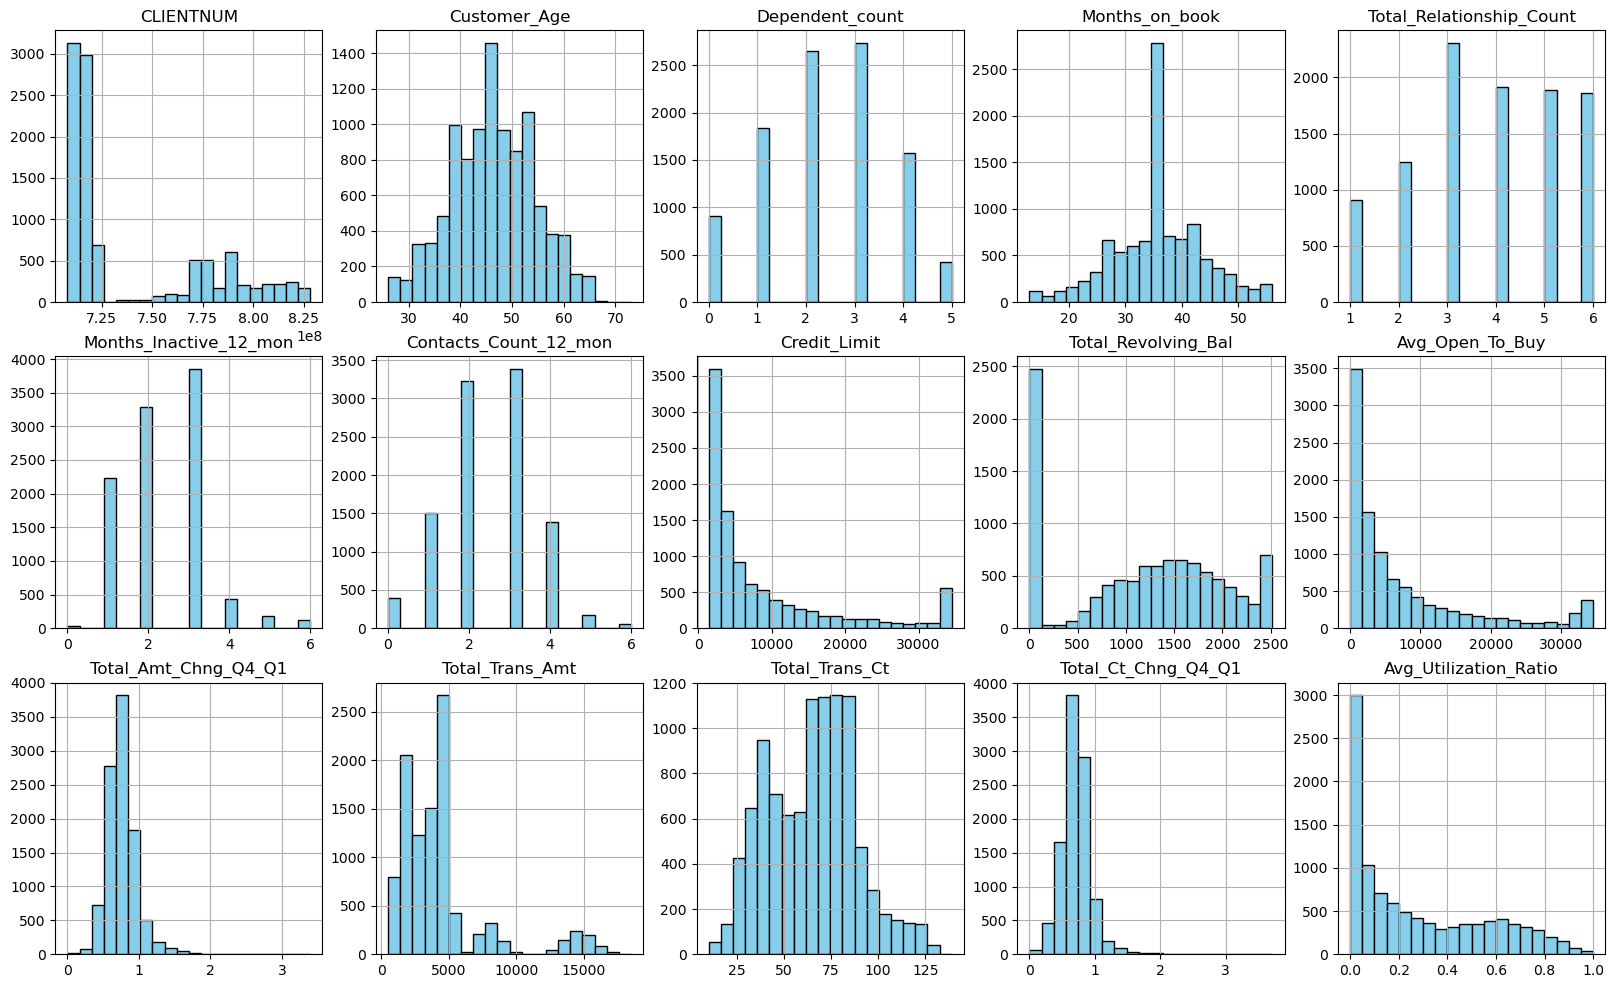

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12)) 
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.grid(True)